In [7]:
"""
🎖️ GRÁFICAS DE LÍNEAS PARA MODELOS DE MACHINE LEARNING
==============================================================
Regresión Logística, KNN (15 vecinos) y SGDClassifier
"""

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import sklearn
import warnings
warnings.filterwarnings('ignore')

print("🚀 ML MODELS - ACCURACY PLOTS")
print(f"📌 Versión de scikit-learn: {sklearn.__version__}")
print("=" * 80)

# Emociones y parámetros
EMOTIONS = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
NUM_CLASSES = len(EMOTIONS)
PARAMS = {
    'data_path': r'C:\Users\maria\OneDrive\Documentos\AnotherSigma\PONTIA\PROYECTO JUPITER\archive',
    'img_size': 48,
    'random_state': 42
}

🚀 ML MODELS - ACCURACY PLOTS
📌 Versión de scikit-learn: 1.4.2


In [8]:
# =============================================================================
# 1. 📊 Carga y Preprocesamiento de Datos
# =============================================================================
print("\n📊 CARGANDO DATOS...")
def load_images(data_path, subset):
    X, y = [], []
    for emotion_idx, emotion in enumerate(EMOTIONS):
        folder = os.path.join(data_path, subset, emotion)
        for img_name in os.listdir(folder):
            img_path = os.path.join(folder, img_name)
            try:
                img = load_img(img_path, target_size=(PARAMS['img_size'], PARAMS['img_size']), color_mode='rgb')
                img_array = img_to_array(img) / 255.0  # Normalizar
                X.append(img_array.flatten())  # Aplanar imagen
                y.append(emotion_idx)
            except Exception as e:
                print(f"❌ Error cargando {img_path}: {e}")
    return np.array(X), np.array(y)

try:
    X_train, y_train = load_images(PARAMS['data_path'], 'train')
    X_test, y_test = load_images(PARAMS['data_path'], 'test')
    print(f"✅ Entrenamiento: {X_train.shape[0]} imágenes, Prueba: {X_test.shape[0]} imágenes")
except Exception as e:
    print(f"❌ Error al cargar datos: {e}")
    exit()

# Pesos de clase
print("\n⚖️ CALCULANDO PESOS...")
try:
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights_dict = dict(enumerate(class_weights))
    print("📊 Pesos por clase:", {EMOTIONS[i]: f"{w:.3f}" for i, w in class_weights_dict.items()})
except Exception as e:
    print(f"❌ Error al calcular pesos: {e}")
    exit()


📊 CARGANDO DATOS...
✅ Entrenamiento: 28709 imágenes, Prueba: 7178 imágenes

⚖️ CALCULANDO PESOS...
📊 Pesos por clase: {'angry': '1.027', 'disgust': '9.407', 'fear': '1.001', 'happy': '0.568', 'neutral': '0.826', 'sad': '0.849', 'surprise': '1.293'}



🏗️ REGRESIÓN LOGÍSTICA

🔧 FORMACIÓN DEL MODELO...
✅ Modelo creado

🚀 ENTRENANDO...
✅ Entrenamiento completado!

📈 GRÁFICO DE PRECISIÓN...


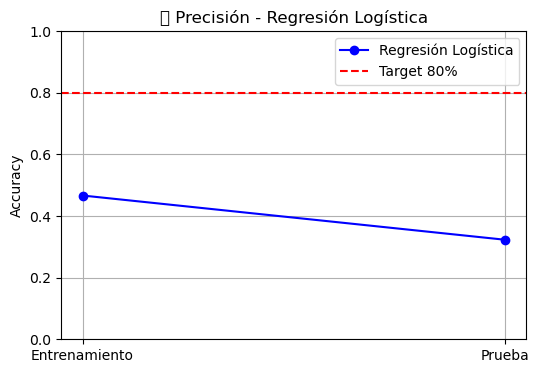


📊 Train Accuracy: 0.4668
📊 Test Accuracy: 0.3231
🎯 Target 80%: ❌ NO ALCANZADO


In [9]:
# =============================================================================
# 2. 🏗️ Modelo 1: Regresión Logística
# =============================================================================
print("\n" + "="*80)
print("🏗️ REGRESIÓN LOGÍSTICA")
print("="*80)

# Formación del Modelo
print("\n🔧 FORMACIÓN DEL MODELO...")
try:
    lr_model = LogisticRegression(
        multi_class='multinomial',
        class_weight='balanced',
        max_iter=1000,
        solver='saga',
        random_state=PARAMS['random_state']
    )
    print("✅ Modelo creado")
except Exception as e:
    print(f"❌ Error al crear modelo: {e}")
    exit()

# Entrenamiento del Modelo
print("\n🚀 ENTRENANDO...")
try:
    lr_model.fit(X_train, y_train)
    print("✅ Entrenamiento completado!")
except Exception as e:
    print(f"❌ Error en entrenamiento: {e}")
    exit()

# Gráfico de Precisión
print("\n📈 GRÁFICO DE PRECISIÓN...")
try:
    train_accuracy_lr = accuracy_score(y_train, lr_model.predict(X_train))
    test_accuracy_lr = accuracy_score(y_test, lr_model.predict(X_test))
    
    plt.figure(figsize=(6, 4))
    plt.plot(['Entrenamiento', 'Prueba'], [train_accuracy_lr, test_accuracy_lr], marker='o', linestyle='-', color='b', label='Regresión Logística')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Target 80%')
    plt.title('🎯 Precisión - Regresión Logística')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.savefig('lr_accuracy_plot.png', dpi=300)
    plt.show()
    
    print(f"\n📊 Train Accuracy: {train_accuracy_lr:.4f}")
    print(f"📊 Test Accuracy: {test_accuracy_lr:.4f}")
    print(f"🎯 Target 80%: {'✅ ALCANZADO' if test_accuracy_lr >= 0.8 else '❌ NO ALCANZADO'}")
except Exception as e:
    print(f"❌ Error en gráfico: {e}")


🏗️ K-NEAREST NEIGHBORS (KNN)


🔧 FORMACIÓN DEL MODELO...
✅ Modelo creado

🚀 ENTRENANDO...
✅ Entrenamiento completado!

📈 GRÁFICO DE PRECISIÓN...


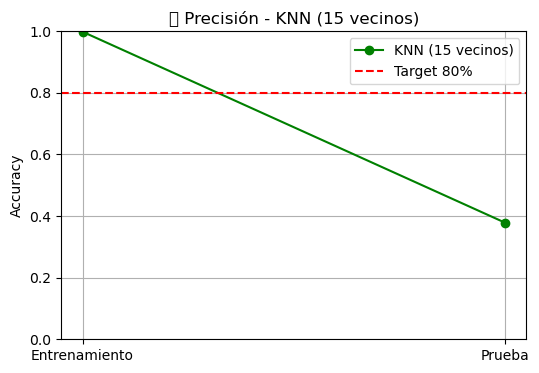


📊 Train Accuracy: 0.9985
📊 Test Accuracy: 0.3782
🎯 Target 80%: ❌ NO ALCANZADO


In [11]:
# =============================================================================
# 3. 🏗️ Modelo 2: KNN (15 vecinos)
# =============================================================================
print("\n" + "="*80)
print("🏗️ K-NEAREST NEIGHBORS (KNN)")
print("="*-80)

# Formación del Modelo
print("\n🔧 FORMACIÓN DEL MODELO...")
try:
    knn_model = KNeighborsClassifier(
        n_neighbors=15,
        weights='distance',
        n_jobs=-1
    )
    print("✅ Modelo creado")
except Exception as e:
    print(f"❌ Error al crear modelo: {e}")
    exit()

# Entrenamiento del Modelo
print("\n🚀 ENTRENANDO...")
try:
    knn_model.fit(X_train, y_train)
    print("✅ Entrenamiento completado!")
except Exception as e:
    print(f"❌ Error en entrenamiento: {e}")
    exit()

# Gráfico de Precisión
print("\n📈 GRÁFICO DE PRECISIÓN...")
try:
    train_accuracy_knn = accuracy_score(y_train, knn_model.predict(X_train))
    test_accuracy_knn = accuracy_score(y_test, knn_model.predict(X_test))
    
    plt.figure(figsize=(6, 4))
    plt.plot(['Entrenamiento', 'Prueba'], [train_accuracy_knn, test_accuracy_knn], marker='o', linestyle='-', color='g', label='KNN (15 vecinos)')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Target 80%')
    plt.title('🎯 Precisión - KNN (15 vecinos)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.savefig('knn_accuracy_plot.png', dpi=300)
    plt.show()
    
    print(f"\n📊 Train Accuracy: {train_accuracy_knn:.4f}")
    print(f"📊 Test Accuracy: {test_accuracy_knn:.4f}")
    print(f"🎯 Target 80%: {'✅ ALCANZADO' if test_accuracy_knn >= 0.8 else '❌ NO ALCANZADO'}")
except Exception as e:
    print(f"❌ Error en gráfico: {e}")


📈 GRÁFICO DE PRECISIÓN...


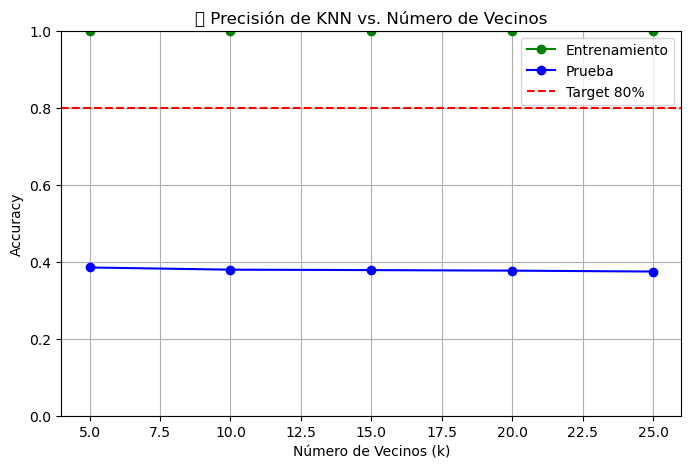


📊 Precisión por número de vecinos:
k=5: Train Accuracy: 0.9985, Test Accuracy: 0.3851
k=10: Train Accuracy: 0.9985, Test Accuracy: 0.3794
k=15: Train Accuracy: 0.9985, Test Accuracy: 0.3782
k=20: Train Accuracy: 0.9985, Test Accuracy: 0.3768
k=25: Train Accuracy: 0.9985, Test Accuracy: 0.3745
🎯 Target 80%: ❌ NO ALCANZADO


In [13]:
# Gráfico de Precisión
print("\n📈 GRÁFICO DE PRECISIÓN...")
try:
    neighbors = [5, 10, 15, 20, 25]
    train_accuracies = []
    test_accuracies = []
    
    for n in neighbors:
        knn_temp = KNeighborsClassifier(n_neighbors=n, weights='distance', n_jobs=-1)
        knn_temp.fit(X_train, y_train)
        train_accuracies.append(accuracy_score(y_train, knn_temp.predict(X_train)))
        test_accuracies.append(accuracy_score(y_test, knn_temp.predict(X_test)))
    
    plt.figure(figsize=(8, 5))
    plt.plot(neighbors, train_accuracies, marker='o', linestyle='-', color='g', label='Entrenamiento')
    plt.plot(neighbors, test_accuracies, marker='o', linestyle='-', color='b', label='Prueba')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Target 80%')
    plt.title('🎯 Precisión de KNN vs. Número de Vecinos')
    plt.xlabel('Número de Vecinos (k)')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.savefig('knn_neighbors_plot.png', dpi=300)
    plt.show()
    
    print("\n📊 Precisión por número de vecinos:")
    for n, train_acc, test_acc in zip(neighbors, train_accuracies, test_accuracies):
        print(f"k={n}: Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"🎯 Target 80%: {'✅ ALCANZADO' if max(test_accuracies) >= 0.8 else '❌ NO ALCANZADO'}")
except Exception as e:
    print(f"❌ Error en gráfico: {e}")


📈 GRÁFICO DE PRECISIÓN...


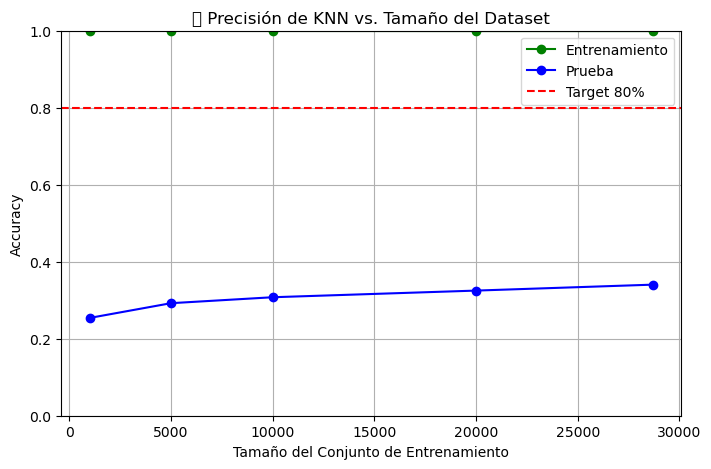


📊 Precisión por tamaño del dataset:
Tamaño=1000: Train Accuracy: 1.0000, Test Accuracy: 0.2540
Tamaño=5000: Train Accuracy: 0.9994, Test Accuracy: 0.2923
Tamaño=10000: Train Accuracy: 0.9993, Test Accuracy: 0.3077
Tamaño=20000: Train Accuracy: 0.9991, Test Accuracy: 0.3250
Tamaño=28709: Train Accuracy: 0.9991, Test Accuracy: 0.3405
🎯 Target 80%: ❌ NO ALCANZADO


In [14]:
# Gráfico de Precisión
print("\n📈 GRÁFICO DE PRECISIÓN...")
try:
    from sklearn.utils import resample
    sample_sizes = [1000, 5000, 10000, 20000, X_train.shape[0]]
    train_accuracies = []
    test_accuracies = []
    
    for size in sample_sizes:
        X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=size, random_state=PARAMS['random_state'])
        knn_temp = KNeighborsClassifier(n_neighbors=15, weights='distance', n_jobs=-1)
        knn_temp.fit(X_train_sample, y_train_sample)
        train_accuracies.append(accuracy_score(y_train_sample, knn_temp.predict(X_train_sample)))
        test_accuracies.append(accuracy_score(y_test, knn_temp.predict(X_test)))
    
    plt.figure(figsize=(8, 5))
    plt.plot(sample_sizes, train_accuracies, marker='o', linestyle='-', color='g', label='Entrenamiento')
    plt.plot(sample_sizes, test_accuracies, marker='o', linestyle='-', color='b', label='Prueba')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Target 80%')
    plt.title('🎯 Precisión de KNN vs. Tamaño del Dataset')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.savefig('knn_dataset_size_plot.png', dpi=300)
    plt.show()
    
    print("\n📊 Precisión por tamaño del dataset:")
    for size, train_acc, test_acc in zip(sample_sizes, train_accuracies, test_accuracies):
        print(f"Tamaño={size}: Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"🎯 Target 80%: {'✅ ALCANZADO' if max(test_accuracies) >= 0.8 else '❌ NO ALCANZADO'}")
except Exception as e:
    print(f"❌ Error en gráfico: {e}")


📈 GRÁFICO DE PRECISIÓN...


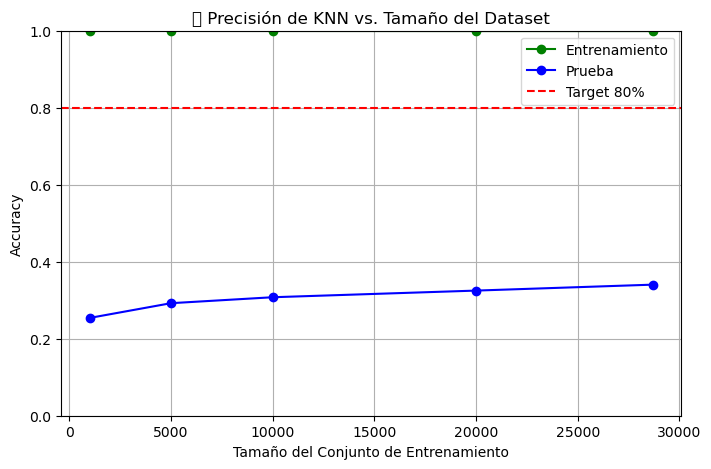


📊 Precisión por tamaño del dataset:
Tamaño=1000: Train Accuracy: 1.0000, Test Accuracy: 0.2540
Tamaño=5000: Train Accuracy: 0.9994, Test Accuracy: 0.2923
Tamaño=10000: Train Accuracy: 0.9993, Test Accuracy: 0.3077
Tamaño=20000: Train Accuracy: 0.9991, Test Accuracy: 0.3250
Tamaño=28709: Train Accuracy: 0.9991, Test Accuracy: 0.3405
🎯 Target 80%: ❌ NO ALCANZADO


In [15]:
# Gráfico de Precisión
print("\n📈 GRÁFICO DE PRECISIÓN...")
try:
    from sklearn.utils import resample
    sample_sizes = [1000, 5000, 10000, 20000, X_train.shape[0]]
    train_accuracies = []
    test_accuracies = []
    
    for size in sample_sizes:
        X_train_sample, y_train_sample = resample(X_train, y_train, n_samples=size, random_state=PARAMS['random_state'])
        knn_temp = KNeighborsClassifier(n_neighbors=15, weights='distance', n_jobs=-1)
        knn_temp.fit(X_train_sample, y_train_sample)
        train_accuracies.append(accuracy_score(y_train_sample, knn_temp.predict(X_train_sample)))
        test_accuracies.append(accuracy_score(y_test, knn_temp.predict(X_test)))
    
    plt.figure(figsize=(8, 5))
    plt.plot(sample_sizes, train_accuracies, marker='o', linestyle='-', color='g', label='Entrenamiento')
    plt.plot(sample_sizes, test_accuracies, marker='o', linestyle='-', color='b', label='Prueba')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Target 80%')
    plt.title('🎯 Precisión de KNN vs. Tamaño del Dataset')
    plt.xlabel('Tamaño del Conjunto de Entrenamiento')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.savefig('knn_dataset_size_plot.png', dpi=300)
    plt.show()
    
    print("\n📊 Precisión por tamaño del dataset:")
    for size, train_acc, test_acc in zip(sample_sizes, train_accuracies, test_accuracies):
        print(f"Tamaño={size}: Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    print(f"🎯 Target 80%: {'✅ ALCANZADO' if max(test_accuracies) >= 0.8 else '❌ NO ALCANZADO'}")
except Exception as e:
    print(f"❌ Error en gráfico: {e}")


🏗️ SGDCLASSIFIER

🔧 FORMACIÓN DEL MODELO...
✅ Modelo creado

🚀 ENTRENANDO...
✅ Entrenamiento completado!

📈 GRÁFICO DE PRECISIÓN...


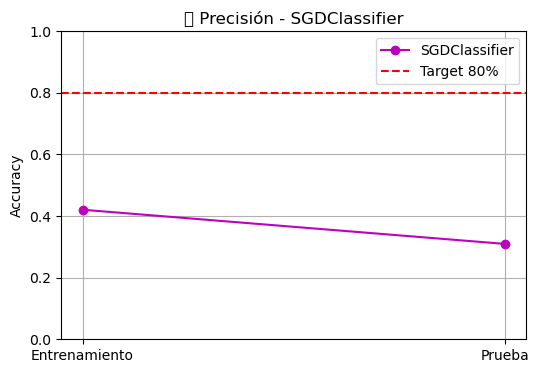


📊 Train Accuracy: 0.4206
📊 Test Accuracy: 0.3096
🎯 Target 80%: ❌ NO ALCANZADO


In [12]:
# =============================================================================
# 4. 🏗️ Modelo 3: SGDClassifier
# =============================================================================
print("\n" + "="*80)
print("🏗️ SGDCLASSIFIER")
print("="*80)

# Formación del Modelo
print("\n🔧 FORMACIÓN DEL MODELO...")
try:
    sgd_model = SGDClassifier(
        loss='log_loss',
        class_weight='balanced',
        max_iter=1000,
        tol=1e-3,
        random_state=PARAMS['random_state'],
        n_jobs=-1
    )
    print("✅ Modelo creado")
except Exception as e:
    print(f"❌ Error al crear modelo: {e}")
    exit()

# Entrenamiento del Modelo
print("\n🚀 ENTRENANDO...")
try:
    sgd_model.fit(X_train, y_train)
    print("✅ Entrenamiento completado!")
except Exception as e:
    print(f"❌ Error en entrenamiento: {e}")
    exit()

# Gráfico de Precisión
print("\n📈 GRÁFICO DE PRECISIÓN...")
try:
    train_accuracy_sgd = accuracy_score(y_train, sgd_model.predict(X_train))
    test_accuracy_sgd = accuracy_score(y_test, sgd_model.predict(X_test))
    
    plt.figure(figsize=(6, 4))
    plt.plot(['Entrenamiento', 'Prueba'], [train_accuracy_sgd, test_accuracy_sgd], marker='o', linestyle='-', color='m', label='SGDClassifier')
    plt.axhline(y=0.8, color='r', linestyle='--', label='Target 80%')
    plt.title('🎯 Precisión - SGDClassifier')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.grid(True)
    plt.legend()
    plt.savefig('sgd_accuracy_plot.png', dpi=300)
    plt.show()
    
    print(f"\n📊 Train Accuracy: {train_accuracy_sgd:.4f}")
    print(f"📊 Test Accuracy: {test_accuracy_sgd:.4f}")
    print(f"🎯 Target 80%: {'✅ ALCANZADO' if test_accuracy_sgd >= 0.8 else '❌ NO ALCANZADO'}")
except Exception as e:
    print(f"❌ Error en gráfico: {e}")